<h1 align="center"> 
  BitCoin Heist Ransomware Address
</h1>

<h4 align="center">
    <img alt="BitcoinHeist" title="#BitcoinHeist" src="https://exame.com/wp-content/uploads/2021/03/Dollar-bitcoin-1.jpg" width="400px;" />
</h4>

## 🔍 About

Bitcoin has revolutionized the currency in our world. Cryptocurrency is a virtual currency, based in blockchain, a distributed system in which transaction are made in an intriguing safety due to it's de-centralized, untraceable and immutable aspects. Recently, ramsomware attackers have evolved in the way they charge to unlock attacked systems, asking for cryptocurrency as payment. As blockchain is hard to track, this study aims to analyse how transactions take place and try to predict if a cryptocoin - in this case Bitcoin - address is being used for malicious intent or not.

In this [link](https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset), you can locate the dataset that was used. We also made a jupyter notebook available for a better comprehension of the topic.

## 🦸 Authors
- Felipe Tavoni
- Reynold N. Mazo


# **Importing Libraries and Reading Data**

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, homogeneity_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
!gdown --id 11ky8x9fhB6gPLUsQUKQzOV7K-ES5paof 

Downloading...
From: https://drive.google.com/uc?id=11ky8x9fhB6gPLUsQUKQzOV7K-ES5paof
To: /content/BitcoinHeistData.csv
100% 236M/236M [00:07<00:00, 32.0MB/s]


In [ ]:
bitcoin_data = pd.read_csv('BitcoinHeistData.csv', delimiter=',')

# **Exploratory Data Analysis**

### **Dataset**

> Below, we're just exibiting the values present on our dataset

In [ ]:
bitcoin_data

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


---
### **Unbalanced Samples**

#### **Unique amount of labels**
> The query below shows that our *dataset* has 29 unique labels.

In [ ]:
#Verificando a quantidade de valores únicos no atributo `label`
bitcoin_data.groupby('label').nunique()

,address,year,day,length,weight,count,looped,neighbors,income
label,,,,,,,,,
montrealAPT,2,2,11,5,10,7,3,5,10
montrealComradeCircle,1,1,1,1,1,1,1,1,1
montrealCryptConsole,5,1,6,5,5,3,1,1,5
montrealCryptXXX,1354,1,135,70,942,554,83,14,268
montrealCryptoLocker,1509,5,365,73,3326,1174,454,47,5970
montrealCryptoTorLocker2015,32,3,35,12,43,12,12,22,50
montrealDMALocker,21,2,178,18,115,74,34,9,208
montrealDMALockerv3,143,2,184,27,151,96,24,5,148
montrealEDA2,4,2,4,4,6,4,2,2,4


#### **Binarization**

> As we can observe on queries below, the ammount of ransomware's equal to 1.42% of the whole data. As that said, we must reduce the ammount of observations used to train our model, since it can affect the final performance.

> Here, we will convert those 29 unique labels into only 2 (it's ransomware & not/unknown ransomware). A under-sampling method was used, which consists of selecting a random ammount of the majority data to match the same ammount of the minority data. No criteria was used, just random.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total: 2916697
Class 0 (White): 2875284
Class 1 (Ransomware): 41413


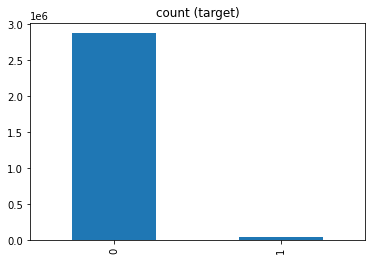

In [ ]:
# Separação dos valores de `label` para: white & ransomware
class_white      = bitcoin_data[bitcoin_data['label'] == "white"]
class_ransomware = bitcoin_data[bitcoin_data['label'] != "white"]
# Binarização dos valores de `label` para: white = "0" & ransomware = "1"
class_white['label']      = 0
class_ransomware['label'] = 1
# Quantidade de orservações de cada uma das labels
print('Total:', bitcoin_data.shape[0])
print('Class 0 (White):', class_white.shape[0])
print('Class 1 (Ransomware):', class_ransomware.shape[0])

#Plotagem da discrepancia entre classes 
plot_concat = pd.concat([class_white, class_ransomware], axis=0)
plot_concat['label'].value_counts().plot(kind='bar', title='count (target)')

Novo Total: 82826
total label of 1 and 0: 1    41413
0    41413
Name: label, dtype: int64


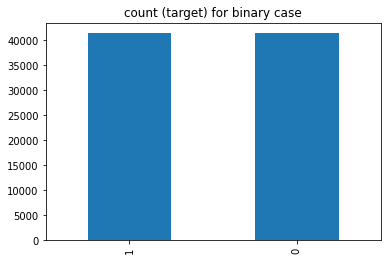

In [ ]:
#Processo de under-sampeling
#binary case
class_white = class_white.sample(n=class_ransomware.shape[0], random_state=49)

bitcoin_data_binary = pd.concat([class_white, class_ransomware], axis=0)

print('Novo Total:', bitcoin_data_binary.shape[0])
print("total label of 1 and 0:", bitcoin_data_binary['label'].value_counts()) # plot apos o under-sampeling
bitcoin_data_binary['label'].value_counts().plot(kind='bar', title='count (target) for binary case')

Novo Total: 82826
total labels: white                          41413
paduaCryptoWall                12390
montrealCryptoLocker            9315
princetonCerber                 9223
princetonLocky                  6625
montrealCryptXXX                2419
montrealNoobCrypt                483
montrealDMALockerv3              354
montrealDMALocker                251
montrealSamSam                    62
montrealGlobeImposter             55
montrealCryptoTorLocker2015       55
montrealGlobev3                   34
montrealGlobe                     32
montrealWannaCry                  28
montrealRazy                      13
montrealAPT                       11
paduaKeRanger                     10
montrealFlyper                     9
montrealXTPLocker                  8
montrealVenusLocker                7
montrealXLockerv5.0                7
montrealCryptConsole               7
montrealEDA2                       6
montrealJigSaw                     4
paduaJigsaw                        2
montre

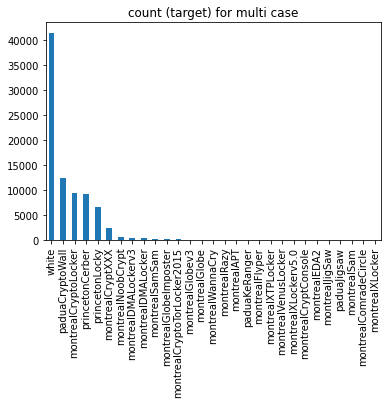

In [ ]:
#Processo de under-sampeling
#multi case
class_white      = bitcoin_data[bitcoin_data['label'] == "white"]
class_ransomware = bitcoin_data[bitcoin_data['label'] != "white"]

class_white = class_white.sample(n=class_ransomware.shape[0], random_state=49)
bitcoin_data = pd.concat([class_white, class_ransomware], axis=0)

print('Novo Total:', bitcoin_data.shape[0])
print("total labels:", bitcoin_data['label'].value_counts()) # plot apos o under-sampeling
bitcoin_data['label'].value_counts().plot(kind='bar', title='count (target) for multi case')

> Now yes, our data is equalized, and we can have a better prediction without overfitting our model!

---
### **Missing and Duplicate Values**

> As we can see on queries below, there isn't any missing values on our dataset.

In [ ]:
#Multi case
missing_values = bitcoin_data.isna().sum() / len(bitcoin_data)

print(missing_values)

address      0.0
year         0.0
day          0.0
length       0.0
weight       0.0
count        0.0
looped       0.0
neighbors    0.0
income       0.0
label        0.0
dtype: float64


In [ ]:
#Binary case
missing_values = bitcoin_data_binary.isna().sum() / len(bitcoin_data)

print(missing_values)

address      0.0
year         0.0
day          0.0
length       0.0
weight       0.0
count        0.0
looped       0.0
neighbors    0.0
income       0.0
label        0.0
dtype: float64


> Also, we are dropping any data that is duplicate

In [ ]:
#multiclasse
bitcoin_data = bitcoin_data.drop_duplicates()

#binary case
bitcoin_data_binary = bitcoin_data_binary.drop_duplicates()

---
### **Correlation Between Variables**

> A correlation also was made on the *dataset* attributes. We can observe 3 similar behavior:

- *length* -- *count*: the length interaction with count is explained, since the length refers to a hidden address of a Bitcoin while the counter counts the merging address on Bitcoin's graph.

- *count* -- *looped*: Again, loop refers to that division, transition and merge of Bitcoiná addresses.

- *weight* -- *neighboor*: Also, there is a interaction between those variables, since weight and neighboor are related to the fusion of addresses of their neighboors.

Finally, all other variables are disconsidered, since they present a correlation lesser than 50%, which demonstrates that they're not related.

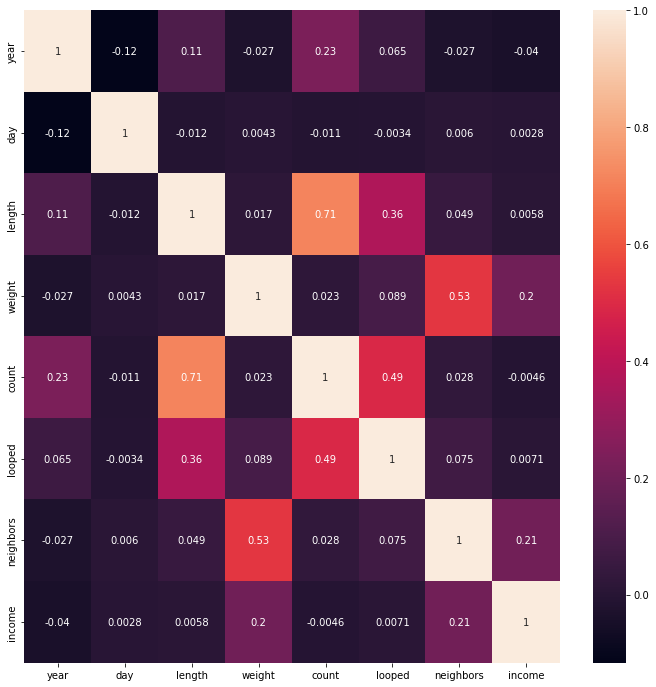

In [ ]:
#Multi case
plt.figure(figsize=(12,12))
# Checking correlation between all features
sns.heatmap(bitcoin_data.corr(), annot=True);

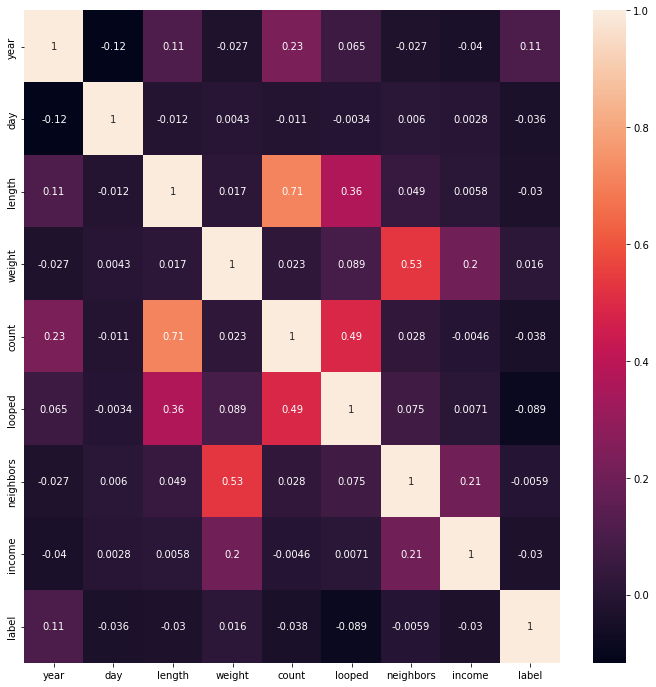

In [ ]:
#Binary case
plt.figure(figsize=(12,12))
# Checking correlation between all features
sns.heatmap(bitcoin_data_binary.corr(), annot=True);

---
### **Plotting all features**

> And below is showed some graphical correlation, i.g., the interaction of a attribute with the others.

<Figure size 864x864 with 0 Axes>

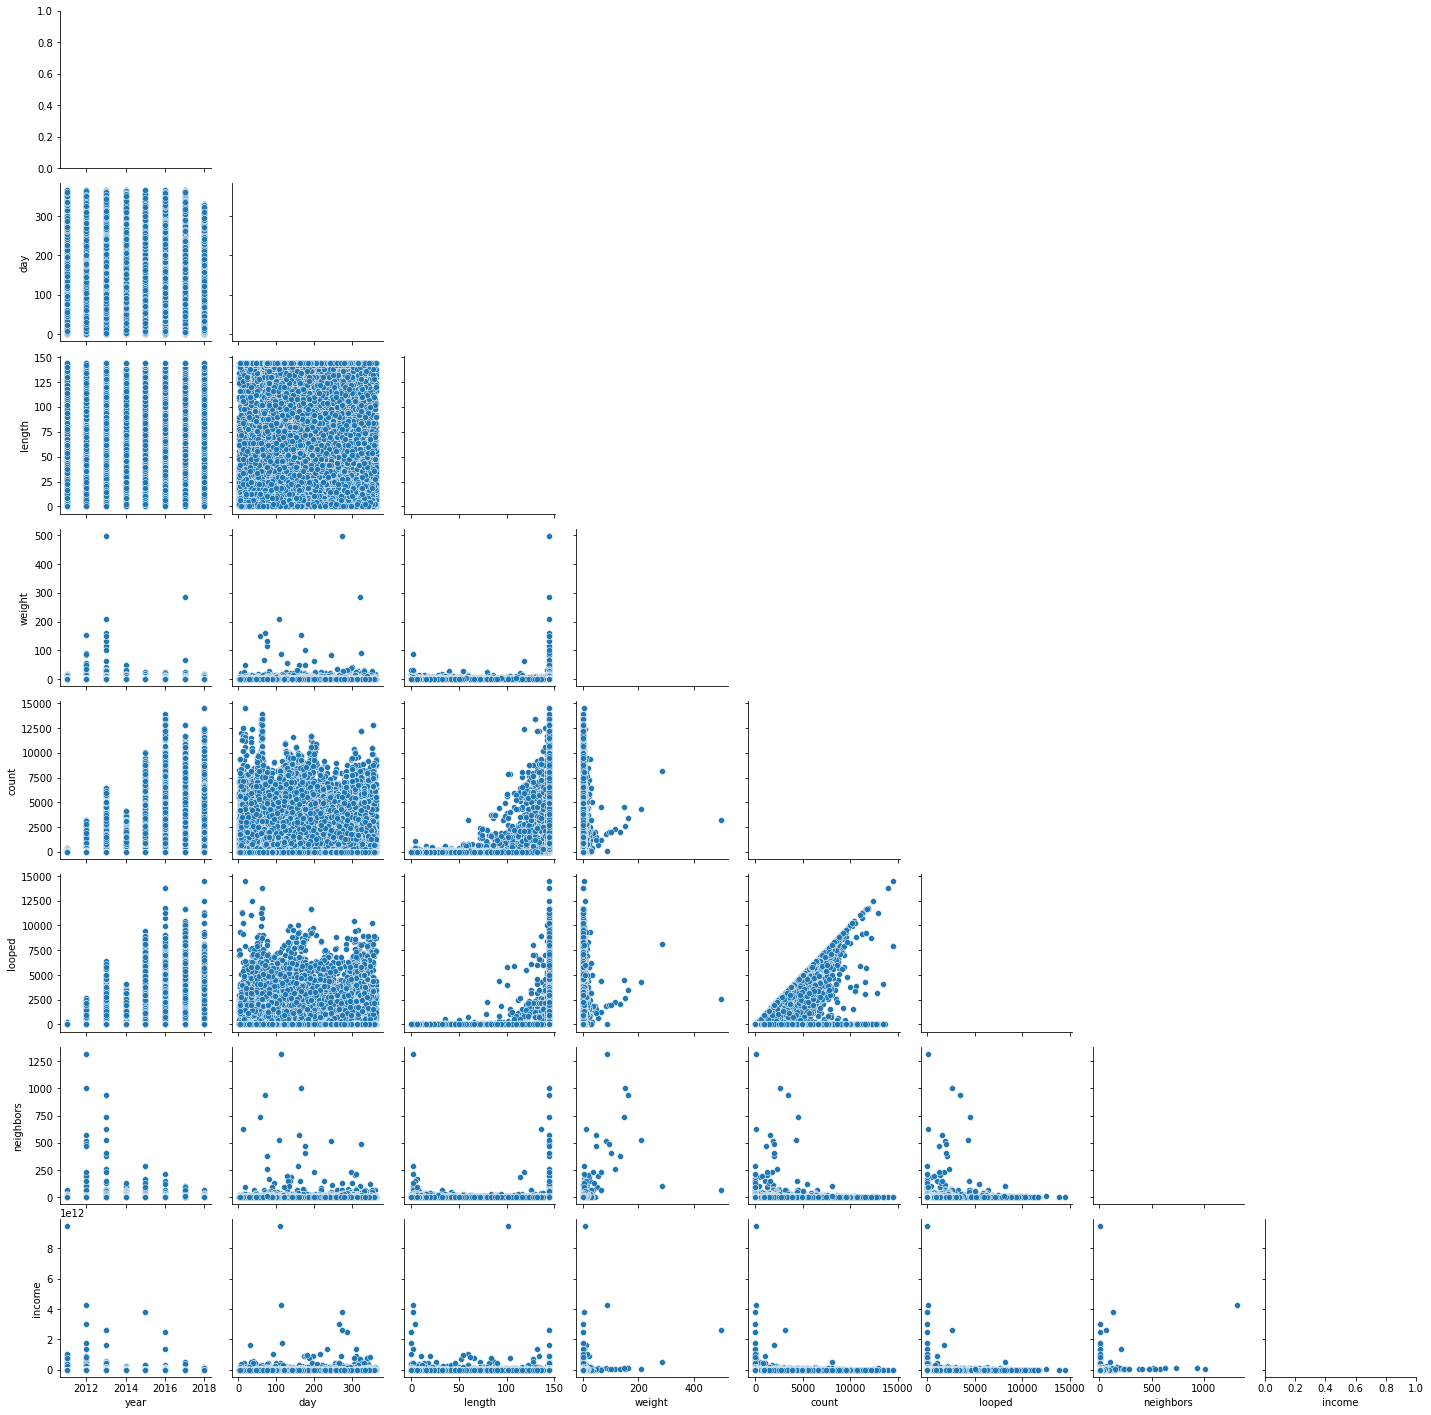

In [ ]:
# Ploting all data
plt.figure(figsize=(12,12))
g = sns.PairGrid(bitcoin_data, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)

# **Model Building, Training and Evaluation**

> Next, we start to build our model. In the next steps, we'll use two approaches. One one them consists of creating a model with 29 labels as target. On the other hand, we'll build a model with only 2 labels, using a binary approach, the *is ransomware* and *isn't a ransomware/unknown*.

## **Multi class clustering (29 Labels)**

### **Building**

#### **Setting up training data**

In [ ]:
class_white      = bitcoin_data[bitcoin_data['label'] == "white"]
class_ransomware = bitcoin_data[bitcoin_data['label'] != "white"]

class_white['label']      = 0
class_ransomware['label'] = class_ransomware['label'].map({  
                                                              "montrealAPT": 1,
                                                              'montrealComradeCircle': 2,
                                                              'montrealCryptConsole': 3,
                                                              'montrealCryptXXX': 4,
                                                              'montrealCryptoLocker': 5,
                                                              'montrealCryptoTorLocker2015': 6,
                                                              'montrealDMALocker': 7,
                                                              'montrealDMALockerv3': 8,
                                                              'montrealEDA2': 9,
                                                              'montrealFlyper': 10,
                                                              'montrealGlobe': 11,
                                                              'montrealGlobeImposter': 12,
                                                              'montrealGlobev3': 13,
                                                              'montrealJigSaw': 14,
                                                              'montrealNoobCrypt': 15,
                                                              'montrealRazy': 16,
                                                              'montrealSam': 17,
                                                              'montrealSamSam': 18,
                                                              'montrealVenusLocker': 19,
                                                              'montrealWannaCry': 20,
                                                              'montrealXLocker': 21,
                                                              'montrealXLockerv5.0': 22,
                                                              'montrealXTPLocker': 23,
                                                              'paduaCryptoWall': 24,
                                                              'paduaJigsaw': 25,
                                                              'paduaKeRanger': 26,
                                                              'princetonCerber': 27,
                                                              'princetonLocky': 28
                                                           
                                                            })

bitcoin_data = pd.concat([class_white, class_ransomware], axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Y_real = bitcoin_data['label']

X_treino = bitcoin_data

X_treino.drop('address', axis = 1, inplace = True)
X_treino.drop('label', axis = 1, inplace = True)

KeyError: ignored

#### **Finding best k value based on Elbow Method**

> The elbow method runs several times the KMeans algorithm, return a *clustering score*. With that in hands, we can analyse the graphic, searching it's elbow, the optimal number of cluster.

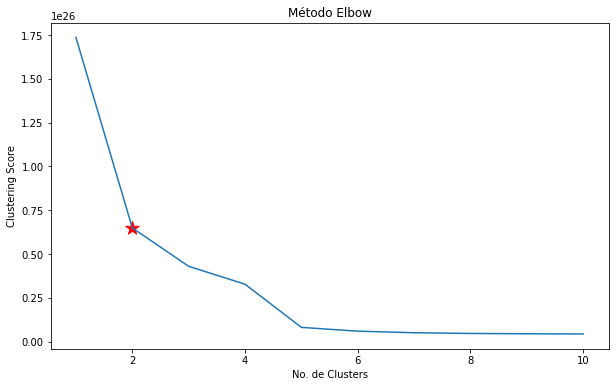

In [ ]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X_treino)
    clustering_score.append(kmeans.inertia_) # inertia_ = Soma das distâncias     
                                             # quadráticas das amostras até o 
                                             # centro do cluster mais próximo.

# Plota a curva característica
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(2,clustering_score[1], s = 200, c = 'red', marker='*')
plt.title('Método Elbow')
plt.xlabel('No. de Clusters')
plt.ylabel('Clustering Score')
plt.show()

### **Testing**

> As previously defined, the model will be first trained with 29 labels as target. Below, we're training it.

In [ ]:
km = KMeans(n_clusters = 29, init = 'random', random_state = 42, n_init = 5)
km.fit(X_treino)
Y_clusters = km.predict(X_treino)

### **Evaluating**

> As evaluation method, the random score is used.

In [ ]:
metrics.rand_score(Y_real, Y_clusters)

0.6580358086921193

In [ ]:
metrics.adjusted_rand_score(Y_real, Y_clusters)

-0.0008925008686903057

In [ ]:
print(classification_report(Y_real,  Y_clusters))

              precision    recall  f1-score   support

           0       0.76      0.01      0.03     41413
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.00      0.01      0.01      2419
           5       0.14      0.13      0.13      9315
           6       0.00      0.05      0.00        55
           7       0.00      0.00      0.00       251
           8       0.00      0.00      0.00       354
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        32
          12       0.00      0.13      0.00        55
          13       0.00      0.62      0.00        34
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00       483
          16       0.00      0.00      0.00        13
          17       0.00    

## **Binary clustering (2 Labels)**


### **Building**

#### **Setting up training data**

In [ ]:
Y_real_binary = bitcoin_data_binary['label']

X_treino_binary = bitcoin_data_binary

X_treino_binary.drop('address', axis = 1, inplace = True)
X_treino_binary.drop('label', axis = 1, inplace = True)

### **Training**

In [ ]:
km = KMeans(n_clusters = 2, init = 'random', random_state = 42, n_init = 5)
km.fit(X_treino_binary)
Y_clusters_binary = km.predict(X_treino_binary)

### **Evaluating**

##### **Random Score**

In [ ]:
metrics.rand_score(Y_real_binary, Y_clusters_binary)

0.4999939678400496

In [ ]:
metrics.adjusted_rand_score(Y_real_binary, Y_clusters_binary)

5.8309906769466945e-09

In [ ]:
print(classification_report(Y_real_binary,  Y_clusters_binary))

              precision    recall  f1-score   support

           0       0.83      0.00      0.00     41413
           1       0.50      1.00      0.67     41413

    accuracy                           0.50     82826
   macro avg       0.67      0.50      0.33     82826
weighted avg       0.67      0.50      0.33     82826



##### **Confusion matrix**

Text(33.0, 0.5, 'True Values')

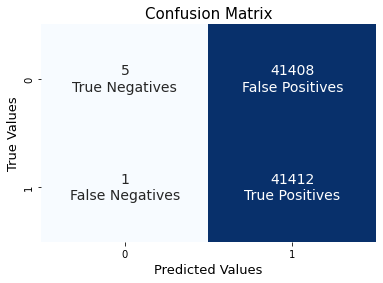

In [ ]:
# Calcula a matrix de confusão
cm = confusion_matrix(Y_real_binary,Y_clusters_binary)
# Gera um gráfico da matrix de confusão do tipo heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues', 
                 cbar=False, annot_kws={"size": 14}, fmt='g')
# Dá nomes aos campos das matrix
cmlabels = ['True Negatives', 'False Positives',
            'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
	t.set_text(t.get_text() + "\n" + cmlabels[i])
 
# Dá nome ao título e eixos 
plt.title('Confusion Matrix', size=15)
plt.xlabel('Predicted Values', size=13)
plt.ylabel('True Values', size=13)

# **Extra: Building And Training With All Samples**

## **29 Labels, 2 Clusters**

### **Building**

In [ ]:
bitcoin_data_full = pd.read_csv('BitcoinHeistData.csv', delimiter=',')

In [ ]:
Y_real_full = bitcoin_data_full['label']

X_treino_full = bitcoin_data_full.copy()

X_treino_full.drop('address', axis = 1, inplace = True)
X_treino_full.drop('label', axis = 1, inplace = True)

### **Training**

In [ ]:
km = KMeans(n_clusters = 2, init = 'random', random_state = 42, n_init = 5)
km.fit(X_treino_full)
Y_clusters_full = km.predict(X_treino_full)

### **Testing**

In [ ]:
metrics.rand_score(Y_real_full, Y_clusters_full)

0.9718285553533228

In [ ]:
metrics.adjusted_rand_score(Y_real_full, Y_clusters_full)

-2.0377181621945756e-05

In [ ]:
Y_real_full_list = Y_real_full.to_list()

In [ ]:
Y_real_full_list

In [ ]:
# Y_real_full_list = np.array(Y_real_full_list)
# Y_real_full_list = Y_real_full_list.astype(int)

In [ ]:
for index, label in enumerate(Y_real_full_list):
    if label == 'white':
      Y_real_full_list[index] = 0
    else:
      Y_real_full_list[index] = 1

In [ ]:
print(classification_report(Y_real_full_list,  Y_clusters_full))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00   2875284
           1       0.01      1.00      0.03     41413

    accuracy                           0.01   2916697
   macro avg       0.51      0.50      0.01   2916697
weighted avg       0.99      0.01      0.00   2916697



## **29 Labels, 29 Clusters**

### **Building**

In [ ]:
bitcoin_data_full = pd.read_csv('BitcoinHeistData.csv', delimiter=',')

Maping of labels for further comparison 

In [ ]:
bitcoin_data_full['label'] 

0          princetonCerber
1           princetonLocky
2          princetonCerber
3          princetonCerber
4           princetonLocky
                ...       
2916692              white
2916693              white
2916694              white
2916695              white
2916696              white
Name: label, Length: 2916697, dtype: object

In [ ]:
class_white      = bitcoin_data_full[bitcoin_data_full['label'] == "white"]
class_ransomware = bitcoin_data_full[bitcoin_data_full['label'] != "white"]

class_white['label']      = 0
class_ransomware['label'] = class_ransomware['label'].map({  
                                                              "montrealAPT": 1,
                                                              'montrealComradeCircle': 2,
                                                              'montrealCryptConsole': 3,
                                                              'montrealCryptXXX': 4,
                                                              'montrealCryptoLocker': 5,
                                                              'montrealCryptoTorLocker2015': 6,
                                                              'montrealDMALocker': 7,
                                                              'montrealDMALockerv3': 8,
                                                              'montrealEDA2': 9,
                                                              'montrealFlyper': 10,
                                                              'montrealGlobe': 11,
                                                              'montrealGlobeImposter': 12,
                                                              'montrealGlobev3': 13,
                                                              'montrealJigSaw': 14,
                                                              'montrealNoobCrypt': 15,
                                                              'montrealRazy': 16,
                                                              'montrealSam': 17,
                                                              'montrealSamSam': 18,
                                                              'montrealVenusLocker': 19,
                                                              'montrealWannaCry': 20,
                                                              'montrealXLocker': 21,
                                                              'montrealXLockerv5.0': 22,
                                                              'montrealXTPLocker': 23,
                                                              'paduaCryptoWall': 24,
                                                              'paduaJigsaw': 25,
                                                              'paduaKeRanger': 26,
                                                              'princetonCerber': 27,
                                                              'princetonLocky': 28
                                                           
                                                            })

bitcoin_data_full = pd.concat([class_white, class_ransomware], axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Y_real_full = bitcoin_data_full['label']

X_treino_full = bitcoin_data_full.copy()

X_treino_full.drop('address', axis = 1, inplace = True)
X_treino_full.drop('label', axis = 1, inplace = True)

### **Training**

In [ ]:
km = KMeans(n_clusters = 29, init = 'random', random_state = 42, n_init = 5)
km.fit(X_treino_full)
Y_clusters_full = km.predict(X_treino_full)

### **Testing**

In [ ]:
metrics.rand_score(Y_real_full, Y_clusters_full)

0.38359410977407665

In [ ]:
metrics.adjusted_rand_score(Y_real_full, Y_clusters_full)

-0.008707585418821414

In [ ]:
#change the type to fit with the predict array
Y_real_full = Y_real_full.astype(int)

In [ ]:
print(classification_report(Y_real_full,  Y_clusters_full))

              precision    recall  f1-score   support

           0       0.99      0.09      0.16   2875284
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00      2419
           5       0.00      0.00      0.00      9315
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00       251
           8       0.00      0.26      0.00       354
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        34
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00       483
          16       0.00      0.00      0.00        13
          17       0.00    

## **2 Labels, 2 Clusters**

### **Building**

In [ ]:
Y_real_full = bitcoin_data_full['label']

X_treino_full = bitcoin_data_full

X_treino_full.drop('address', axis = 1, inplace = True)
X_treino_full.drop('label', axis = 1, inplace = True)

### **Training**

In [ ]:
km = KMeans(n_clusters = 2, init = 'random', random_state = 42, n_init = 5)
km.fit(X_treino_full)
Y_clusters_full = km.predict(X_treino_full)

### **Evaluating**

In [ ]:
metrics.rand_score(Y_real_full, Y_clusters_full)

0.9718285553533228

In [ ]:
metrics.adjusted_rand_score(Y_real_full, Y_clusters_full)

-2.0377181621945756e-05

In [ ]:
Y_real_full

41413    0
41414    0
41415    0
41416    0
41417    0
        ..
41408    1
41409    1
41410    1
41411    1
41412    1
Name: label, Length: 2916697, dtype: int64

Text(33.0, 0.5, 'True Values')

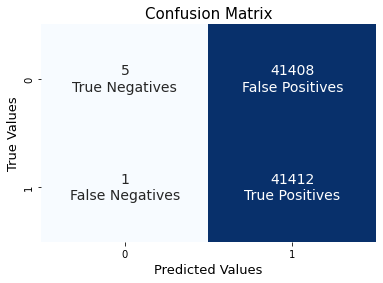

In [ ]:
# Calcula a matrix de confusão
cm = confusion_matrix(Y_real_binary,Y_clusters_binary)
# Gera um gráfico da matrix de confusão do tipo heatmap
ax = sns.heatmap(cm, annot=True, cmap='Blues', 
                 cbar=False, annot_kws={"size": 14}, fmt='g')
# Dá nomes aos campos das matrix
cmlabels = ['True Negatives', 'False Positives',
            'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
	t.set_text(t.get_text() + "\n" + cmlabels[i])
 
# Dá nome ao título e eixos 
plt.title('Confusion Matrix', size=15)
plt.xlabel('Predicted Values', size=13)
plt.ylabel('True Values', size=13)

# **Silhouette Technique**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_treino)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_treino, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The avarage score of silhouette is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_treino, cluster_labels)

For n_clusters = 2 The avarage score of silhouette is : 0.9991509411838112
For n_clusters = 3 The avarage score of silhouette is : 0.9985846487232503
For n_clusters = 4 The avarage score of silhouette is : 0.995711314275281
For n_clusters = 5 The avarage score of silhouette is : 0.9880104101135602


# **PCA**


In [ ]:
# Importação do módulo PCA
from sklearn.decomposition import PCA

# Atribui 2 componentes principais
pca = PCA(n_components=2)
# Realiza a transformação PCA do dataset treino
X_treino = bitcoin_data 
principalComponents = pca.fit_transform(X_treino)

# Transforma o objeto numpy array em dataframe e atribui nomes às colunas
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

# Concatena o atributo alvo ao novo dataset reduzido 
X_reduced = pd.concat([principalDf, Y_real_binary], axis = 1)
X_reduced.head()

,principal_component_1,principal_component_2,label
0,-1.873832e+09,2812.505878,1.0
1,-2.116059e+09,-670.598810,1.0
2,1.441949e+11,-661.142517,1.0
3,-1.919148e+09,-679.063620,1.0
4,-2.132112e+09,75.762478,1.0


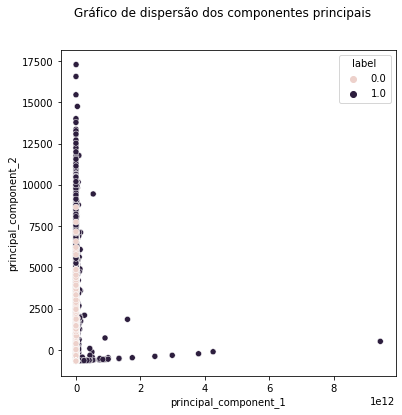

In [ ]:
# Plota o gráfico de dispersão do novo dataset com transformação PCA
fig = plt.figure(figsize = (6,6))
fig.suptitle('Gráfico de dispersão dos componentes principais')
sns.scatterplot(data = X_reduced, x = 'principal_component_1', 
                y ='principal_component_2', hue = 'label' )

In [ ]:
# Importa o módulo de padronização de escala
from sklearn.preprocessing import StandardScaler

# Realiza o agrupamento via K-means no novo datase
X_reduced.drop('label', axis = 1, inplace = True)

#Remove valores inválidos
X_reduced.dropna(inplace=True)

# Standardize the data
X_std = StandardScaler().fit_transform(X_reduced)

In [ ]:
# Run local implementation of kmeans
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
km.fit(X_std)
# Armazena a localização dos centroids
centroids =  km.cluster_centers_
# Realiza a predição com o modelo treinado
Y_clusters_2 = km.predict(X_std)

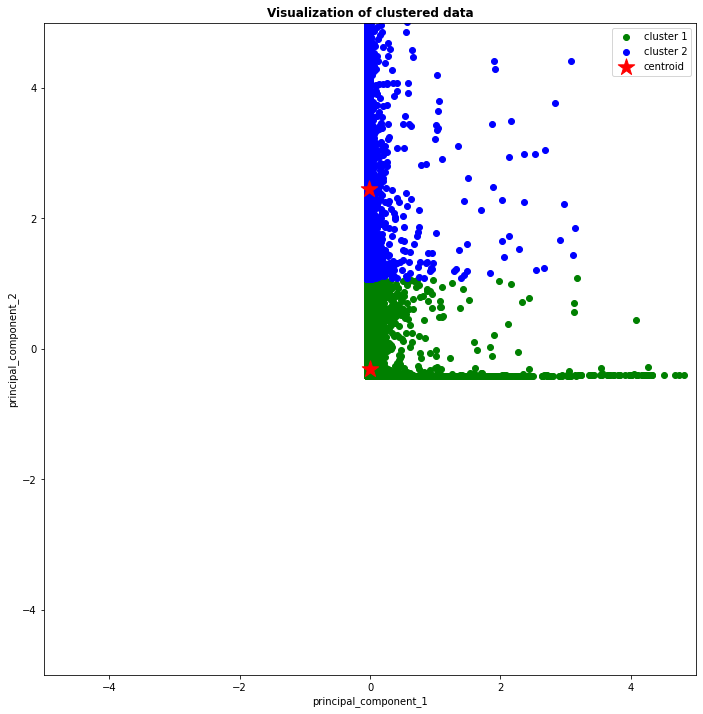

In [ ]:
# Plotagem do gráfico de dispersão dos clusters

# Configura subplots
fig, ax = plt.subplots(figsize=(12, 12))
# Plota a dispersão do primeiro cluster
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
# Plota a dispersão do segundo cluster
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')        

# Marca os centróides com o símbolo estrela
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

# **KNN Experiment for number of neighbors equal to 1**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
bitcoin_data_full = pd.read_csv('BitcoinHeistData.csv', delimiter=',')
Y_real = bitcoin_data_full['label']

X_treino = bitcoin_data_full

X_treino.drop('address', axis = 1, inplace = True)
X_treino.drop('label', axis = 1, inplace = True)

In [ ]:
#Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X_treino, Y_real, test_size=0.3, random_state=42)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

##KNN Multi Case

In [ ]:
#testing
Y_predit = neigh.predict(X_test)

In [ ]:
neigh.score(X_test, Y_test)

0.9784951029131096

In [ ]:
print(classification_report(Y_test, Y_predit))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

                             precision    recall  f1-score   support

                montrealAPT       0.00      0.00      0.00         4
       montrealCryptConsole       0.00      0.00      0.00         4
           montrealCryptXXX       0.69      0.72      0.70       724
       montrealCryptoLocker       0.06      0.06      0.06      2809
montrealCryptoTorLocker2015       0.00      0.00      0.00        16
          montrealDMALocker       0.00      0.00      0.00        63
        montrealDMALockerv3       0.05      0.04      0.05       112
               montrealEDA2       0.00      0.00      0.00         1
             montrealFlyper       0.00      0.00      0.00         4
              montrealGlobe       0.00      0.00      0.00        14
      montrealGlobeImposter       0.00      0.00      0.00        12
            montrealGlobev3       0.00      0.00      0.00         8
             montrealJigSaw       0.00      0.00      0.00         2
          montrealNoobCrypt      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##KNN Binary Case


In [ ]:
#Split the data

X_train_binary, X_test_binary, Y_train_binary, Y_test_binary = train_test_split(X_treino_binary, Y_real_binary, test_size=0.3, random_state=42)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_binary, Y_train_binary)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#testing
Y_predit_binary = neigh.predict(X_test_binary)

In [ ]:
neigh.score(X_test_binary, Y_test_binary)

0.6633934320669672

In [ ]:
print(classification_report(Y_test_binary, Y_predit_binary))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66     12388
           1       0.66      0.68      0.67     12460

    accuracy                           0.66     24848
   macro avg       0.66      0.66      0.66     24848
weighted avg       0.66      0.66      0.66     24848

